In [2]:
from scipy.signal import savgol_filter
def noise_filter(dataframe):
    for column in dataframe.columns:
        dataframe[column] = savgol_filter(dataframe[column], 10, 2, axis=0)
    return dataframe


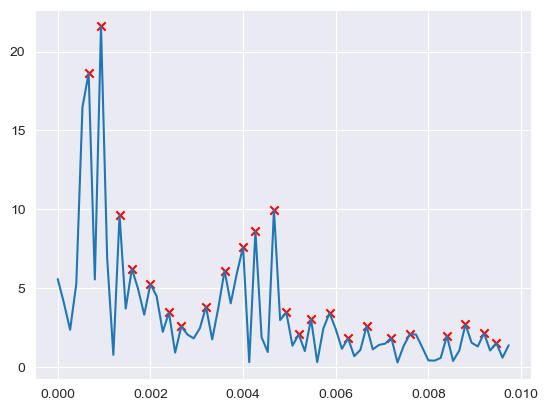

In [17]:
import detecta
import pandas as pd
from matplotlib import pyplot as plt
from numpy.fft import fft
import numpy as np

df=pd.read_csv("../A_DeviceMotion_data/wlk_7/sub_1.csv")


df=df["userAcceleration.z"][20:170]
X=fft(df)
N=len(X)
n=np.arange(-1,N)
sr=1/50
T=N/sr
freq=n/T


n_oneside=N//2
x=freq[1:n_oneside]
y=np.abs(X[1:n_oneside])

max_peak_height=np.amax(y)/20
peaks=detecta.detect_peaks(y, mph=max_peak_height)
peaks_x=peaks/T
peaks_y=y[peaks]
plt.plot(x, y)
plt.scatter(peaks_x, peaks_y, marker="x", c="red")

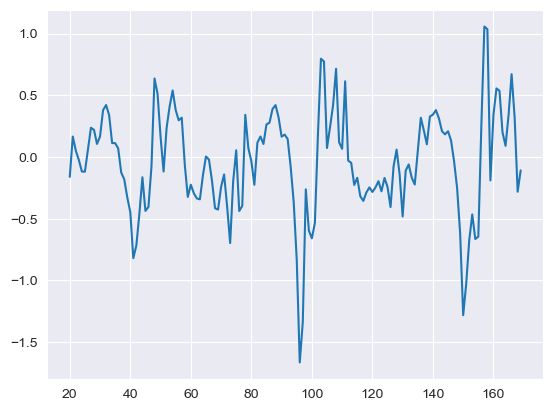

In [18]:
plt.plot(df)